In [1]:
# display, transform, read, 
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

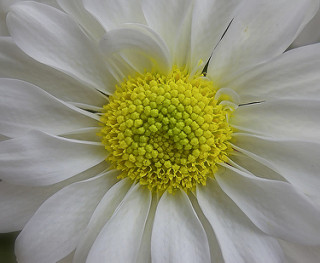

In [2]:
# daisy
img_daisy = image.load_img("train/daisy/100080576_f52e8ee070_n.jpg")
img_daisy

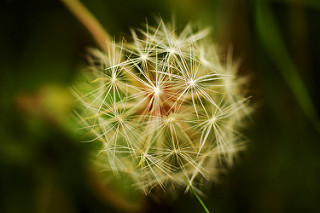

In [3]:
# dandelion
img_dandelion = image.load_img("train/dandelion/10043234166_e6dd915111_n.jpg")
img_dandelion

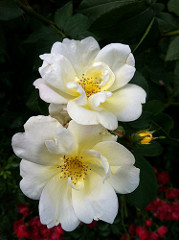

In [4]:
# roses
img_roses = image.load_img("train/roses/10090824183_d02c613f10_m.jpg")
img_roses

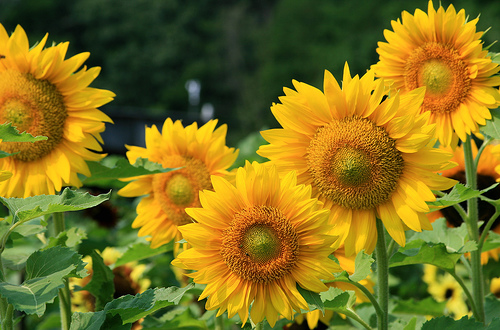

In [5]:
# sunflowers
img_sunflowers = image.load_img("train/sunflowers/1008566138_6927679c8a.jpg")
img_sunflowers

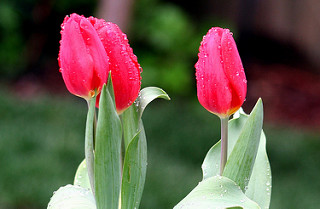

In [6]:
# tulips
img_tulips = image.load_img("train/tulips/100930342_92e8746431_n.jpg")
img_tulips

In [7]:
datagen = ImageDataGenerator()

In [8]:
# define classes name
class_names = ['daisy','dandelion','roses','sunflowers','tulips']

In [9]:
# training data
train_generator = datagen.flow_from_directory( 
    directory="train", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="binary", 
)

Found 3540 images belonging to 5 classes.


In [10]:
# validation data
valid_generator = datagen.flow_from_directory( 
    directory="validation", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

Found 80 images belonging to 5 classes.


In [11]:
# test data
test_generator = datagen.flow_from_directory( 
    directory="test", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

Found 50 images belonging to 5 classes.


In [12]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [13]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(5, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [14]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

In [15]:
# launch the training
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")

Epoch 1/10


C:\Users\varun\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


111/111 ━━━━━━━━━━━━━━━━━━━━ 460s 4s/step - accuracy: 0.2760 - loss: 2.2553 - val_accuracy: 0.6000 - val_loss: 1.0875
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 529s 5s/step - accuracy: 0.5290 - loss: 1.1715 - val_accuracy: 0.8000 - val_loss: 0.6392
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 656s 6s/step - accuracy: 0.6961 - loss: 0.7860 - val_accuracy: 0.8000 - val_loss: 0.5152
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 403s 4s/step - accuracy: 0.8015 - loss: 0.6176 - val_accuracy: 0.8750 - val_loss: 0.3970
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 284s 2s/step - accuracy: 0.8095 - loss: 0.5551 - val_accuracy: 0.8625 - val_loss: 0.4017
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 406s 4s/step - accuracy: 0.8387 - loss: 0.5055 - val_accuracy: 0.8875 - val_loss: 0.4088
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.8542 - loss: 0.4430 - val_accuracy: 0.8750 - val_loss: 0.3631
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.8798 - loss: 0.3874 - val_accuracy: 0.875

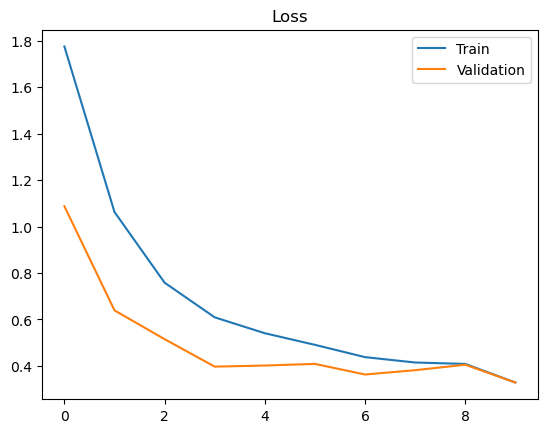

In [16]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

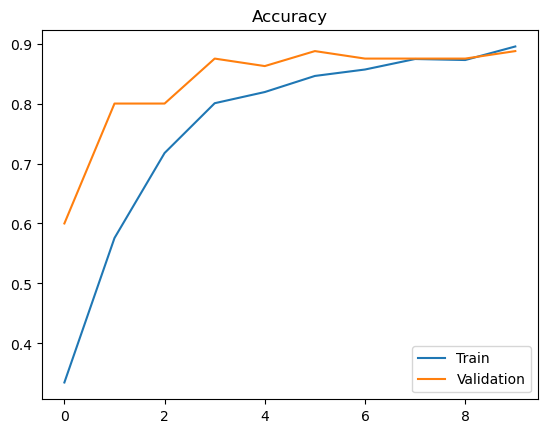

In [17]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [18]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.8442 - loss: 0.6945
The test loss is:  0.6834278106689453
The best accuracy is:  86.00000143051147


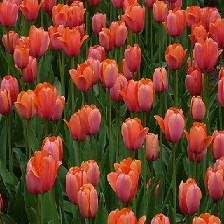

In [19]:
img = tf.keras.preprocessing.image.load_img('test/tulips/2440874162_27a7030402_n.jpg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [20]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
[[1.2539713e-21 2.1117248e-23 5.1821047e-13 9.2863787e-18 1.0000000e+00]]


In [21]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[4]


In [22]:
# transform classes number into classes name
class_names[class_id.item()]

'tulips'

In [23]:
model.save('resnet.h5')

In [24]:
model = tf.keras.models.load_model('resnet.h5')
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 24,809,607 (94.64 MB)

 Trainable params: 1,221,893 (4.66 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2 (12.00 B)

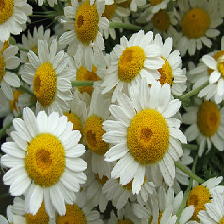

In [25]:
img = tf.keras.preprocessing.image.load_img('test/daisy/538920244_59899a78f8_n.jpg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [26]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[9.9999976e-01 1.9262660e-07 4.0928618e-11 6.7711275e-12 7.1756417e-10]]


In [27]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[0]


In [28]:
# transform classes number into classes name
class_names[class_id.item()]

'daisy'

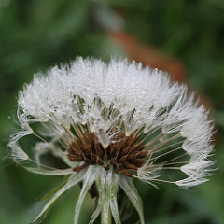

In [29]:
img = tf.keras.preprocessing.image.load_img('test/dandelion/10946896405_81d2d50941_m.jpg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [30]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
[[6.9250659e-06 9.9999285e-01 5.8316679e-10 2.4564628e-07 2.1223656e-08]]


In [31]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[1]


In [32]:
# transform classes number into classes name
class_names[class_id.item()]

'dandelion'

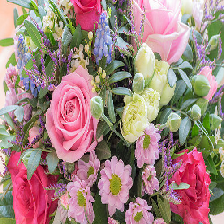

In [33]:
img = tf.keras.preprocessing.image.load_img('test/roses/16903172207_2cd7aca66a.jpg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [34]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
[[1.3780696e-08 3.8272833e-11 9.9885762e-01 6.0121501e-08 1.1422045e-03]]


In [35]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[2]


In [36]:
# transform classes number into classes name
class_names[class_id.item()]

'roses'

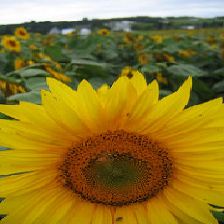

In [37]:
img = tf.keras.preprocessing.image.load_img('test/sunflowers/40411019_526f3fc8d9_m.jpg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [38]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
[[1.6810240e-05 1.3605088e-04 1.8266190e-06 9.9983537e-01 1.0006333e-05]]


In [39]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[3]


In [40]:
# transform classes number into classes name
class_names[class_id.item()]

'sunflowers'